In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('wisconsin-cancer-dataset.csv')

In [3]:
data_train = data_train.drop(['id','Unnamed: 32'],axis=1)

In [4]:
cleanup_num = { 'diagnosis': {'M': 1, 'B': 0 }}
data_train.replace(cleanup_num, inplace=True)

In [5]:
real_data_y = data_train['diagnosis']
data_train = data_train.drop(['diagnosis'],axis=1)

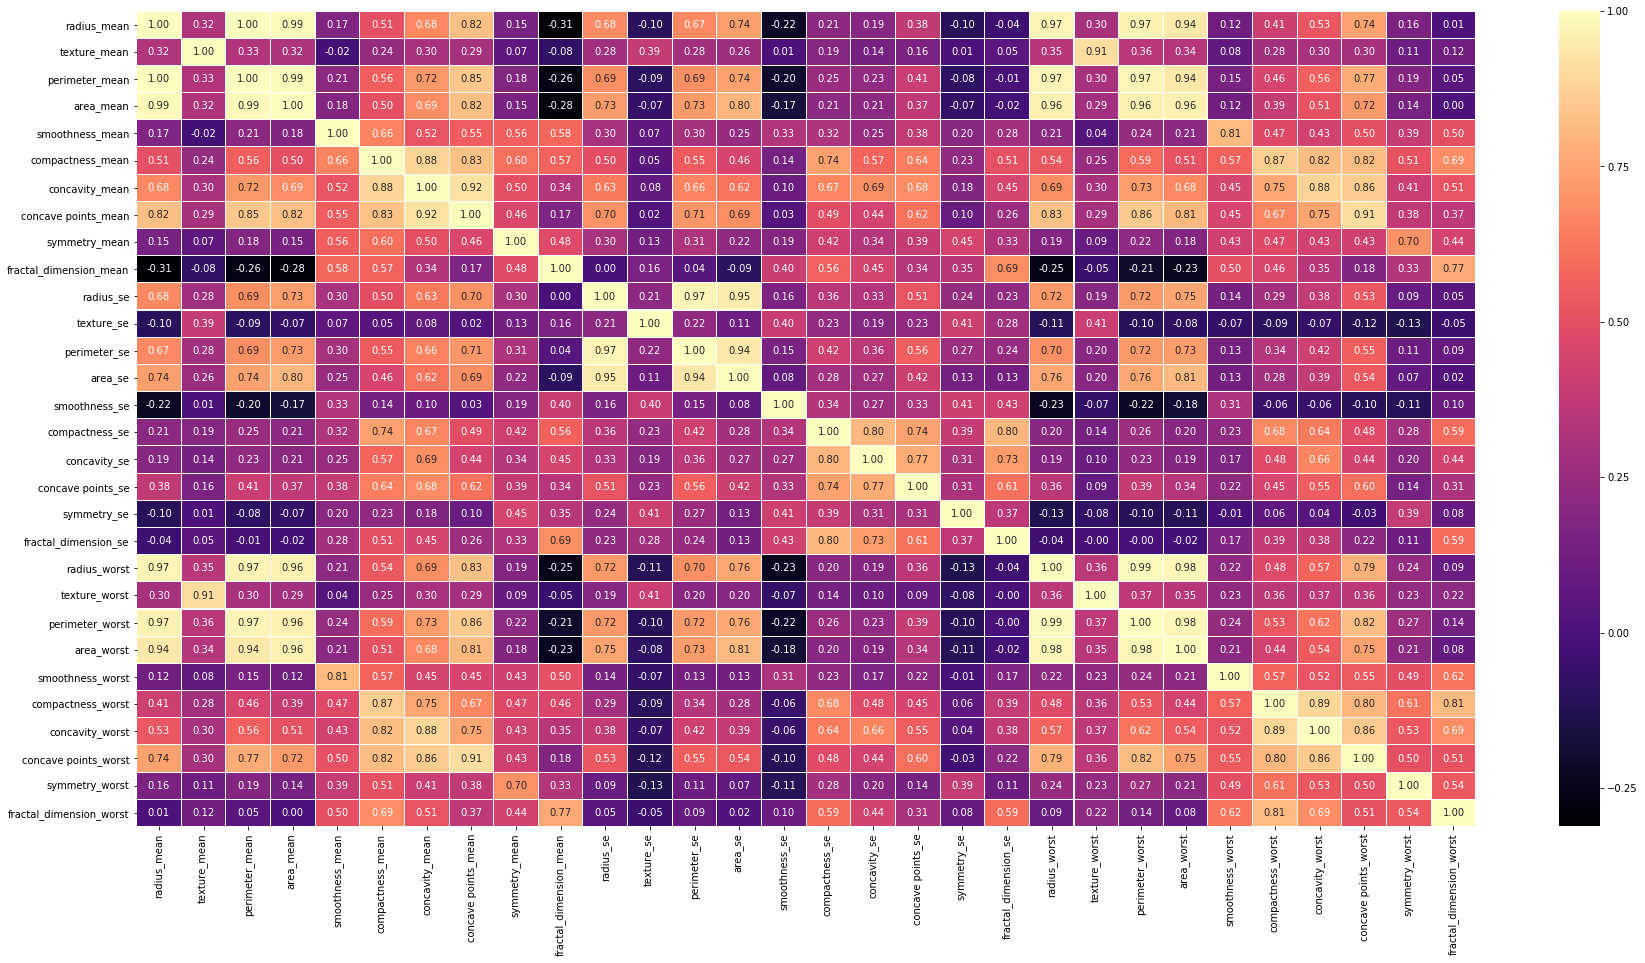

In [6]:
import seaborn as sns
corr = data_train.corr()
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(corr,ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap="magma")
plt.savefig("correlated_heat_map.png")
plt.show()

In [7]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
                columns[j] = False

In [8]:
columns

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True])

In [9]:
corr.shape

(30, 30)

In [10]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [11]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [12]:
data_train = data_train.drop(to_drop,axis=1)

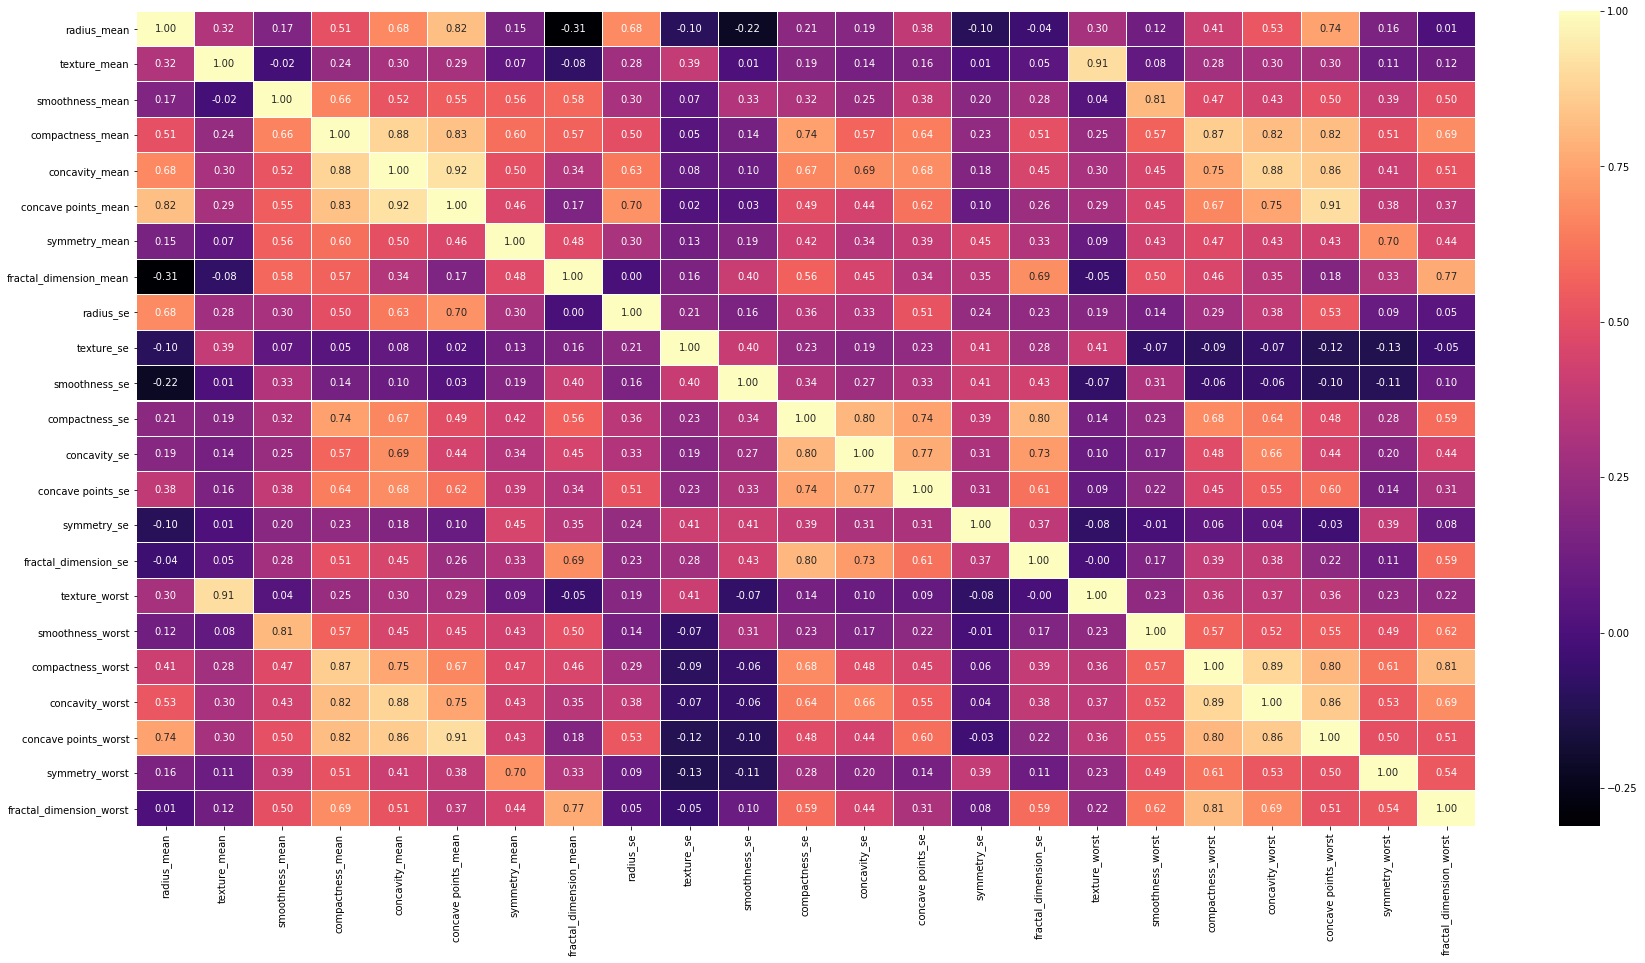

In [13]:
corr_final = data_train.corr()
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(corr_final,ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap="magma")
plt.savefig("correlated_heat_map_final.png")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.values, real_data_y.values, test_size=0.20)

In [15]:
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 455 samples.
Testing set has 114 samples.


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


clf = RandomForestClassifier(random_state=1, max_depth = 11, max_features = 'sqrt' , n_estimators = 600)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob)

roc_auc = auc(fpr, tpr)

print(roc_auc)

0.9990079365079365


In [17]:
from eli5 import show_prediction as sp
from eli5 import explain_weights_sklearn as ews
ews(clf, feature_names=list(data_train.columns))

Weight,Feature
0.1661 ± 0.4773,concave points_worst
0.1614 ± 0.4791,concave points_mean
0.1431 ± 0.3960,radius_mean
0.0971 ± 0.3663,concavity_mean
0.0847 ± 0.3156,concavity_worst
0.0576 ± 0.2102,radius_se
0.0446 ± 0.2045,compactness_worst
0.0354 ± 0.1002,texture_worst
0.0325 ± 0.1084,texture_mean
0.0264 ± 0.1527,compactness_mean


In [18]:
sp(clf, data_train.iloc[224], feature_names= list(data_train.columns), top=20,show_feature_values=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# Let us use 5 fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

forest = RandomForestClassifier(class_weight= "balanced", n_jobs=-1)

forest_params = {'random_state' : range(1,10),
                 'max_depth': range(9, 15),
                 'n_estimators': [300, 400, 500],
                 'max_features': ['sqrt', 'log2', None]}


forest_grid = GridSearchCV(forest, forest_params, scoring='roc_auc',
                           cv=skf, n_jobs=-1, verbose=True)

forest_grid.fit(data_train, real_data_y.values)

forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 7128 candidates, totalling 35640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.4min


In [26]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(data_train.values, real_data_y.values, test_size=0.20)

knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [27]:
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8508771929824561


In [23]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob)

roc_auc = auc(fpr, tpr)

print(roc_auc)

0.857948717948718
